In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [124]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [125]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [126]:
#CoapplicantIncome(spouse income of the particular id person)
#credit history represents that whether they completed or didn't completed 
#the loan before:where 1.0 represents clear and 0 represents nob 

In [127]:
df.shape #rows and columns

(614, 13)

In [128]:
#statistical message only for numerical values
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [129]:
#handling missing values in each column

In [130]:
df.isnull().sum()  #no of missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [131]:
#dropping missing values
data=df.dropna()

In [132]:
#checking again the missing values present or not
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [136]:
#label encoding for output column


In [137]:
data.loc[data['Loan_Status']=='N','Loan_Status',]=0
data.loc[data['Loan_Status']=='Y','Loan_Status',]=1

C:\Users\SHAIK FASIHA\Documents\New folder\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [138]:
#checking whether they are replaced or not
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [139]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [140]:
data['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [141]:
data['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [142]:
data['ApplicantIncome'].value_counts()

2500    7
4583    6
2600    5
8333    4
5000    4
       ..
3357    1
3430    1
6500    1
3427    1
7167    1
Name: ApplicantIncome, Length: 405, dtype: int64

In [143]:
data['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [144]:
data['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [145]:
data['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [146]:
data['CoapplicantIncome'].value_counts()

0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
536.0       1
1833.0      1
1417.0      1
1619.0      1
4000.0      1
Name: CoapplicantIncome, Length: 232, dtype: int64

In [147]:
#want to change 3+ values with 4 as it may be anything i dont want any +,- 
data1=data.replace(to_replace='3+',value=4)

In [148]:
data1['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [149]:
#data visualization :relationship b/t various colums and easy way to analyse

In [150]:
#education and loan_status

In [151]:
#sns choices for plot style and color defaults.it was statistical graphics and it was closely
#integrated with the pandas dataframes which
#helps in understanding the data

In [152]:
#ridge is used to reduce the complexity of model
#it is most suitable when a data set contains a higher number of predictor variables than the
#number of observations

In [153]:
#countplot shows the counts of observations in each categorical bin using bars
#count,joint,dislot,rel,pair

In [154]:
#hue determines which column in dataframe should be used for colour encoding

<AxesSubplot:xlabel='Education', ylabel='count'>

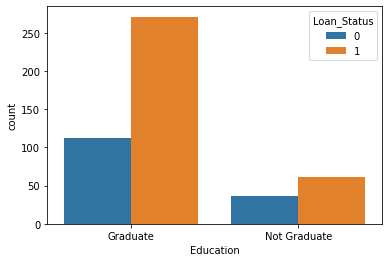

In [155]:
sns.countplot(x='Education',hue='Loan_Status',data=data1)
#it was used to show the counts of observations in each categorical bin using bars

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

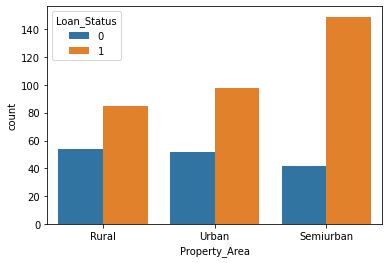

In [156]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data1)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

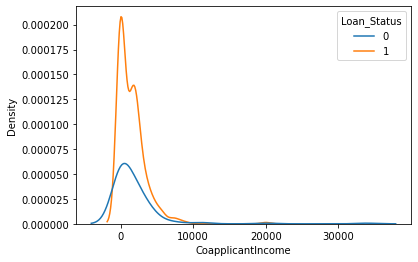

In [157]:
sns.kdeplot(x='CoapplicantIncome',hue='Loan_Status',data=data1)

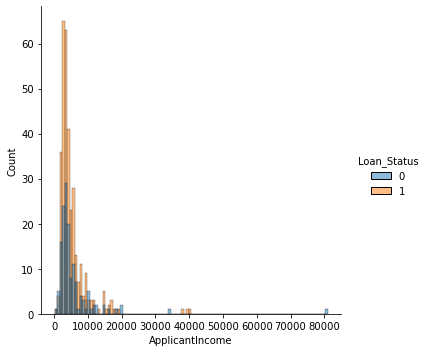

In [158]:
#sns.set_style=("whitegrid");
#sns.FaceGrid(data1,hue='Loan_Status',size=4)\ 
#.map(sns.displot,'ApplicantIncome')\ 
#.add_?legend();
#plt.show()
sns.displot(x='ApplicantIncome',hue='Loan_Status',data=data1)

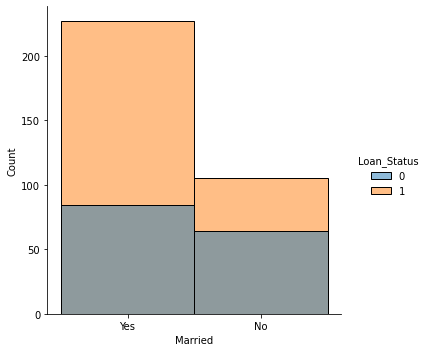

In [159]:
sns.displot(x='Married',hue='Loan_Status',data=data1)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

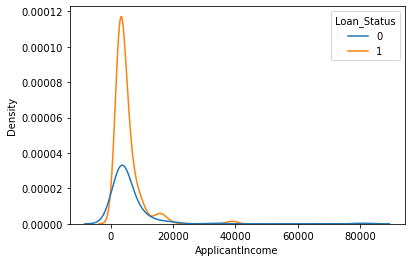

In [160]:
sns.kdeplot(x='ApplicantIncome',hue="Loan_Status",data=data1)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

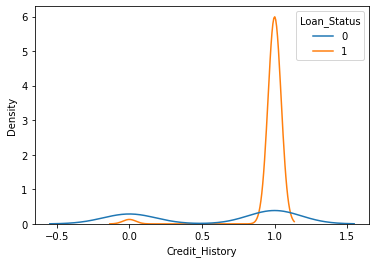

In [161]:
sns.kdeplot(x='Credit_History',hue="Loan_Status",data=data1)

In [162]:
#converting categorical values into numerical values
data=data1.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})

In [163]:
#loan_amount represents the loan amount in thousands.an assumption is if loan 
#amount is higher probability of repaying would be lesser 
#loan_amount_term represnets the number of months required to repay the loan

In [164]:
x=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [165]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [166]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [167]:
#training & testing
#splitting equal no of zeroes in both x and y

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [169]:

print(x.shape,x_train.shape,x_test.shape)

(480, 11) (384, 11) (96, 11)


In [170]:
#training the model using support vector machine
#svm:how close the traing points are close to hyperplane

In [171]:
classifier=svm.SVC(kernel='linear')

In [172]:
#training the svm model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [173]:
#accracy score

In [174]:
x_train_pred=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [175]:
print("Accuracy of training data:",training_data_accuracy)

Accuracy of training data: 0.7786458333333334


In [176]:
x_test_pred=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [177]:
print("Accuracy of testing data:",testing_data_accuracy)

Accuracy of testing data: 0.8125


In [178]:
x.ndim

2

In [179]:
y.ndim

1

In [180]:
mismatched=np.where(y_test!=x_test_pred)

In [181]:
mismatched

(array([ 2, 18, 26, 29, 35, 38, 44, 48, 49, 52, 55, 56, 78, 84, 85, 89, 91,
        95], dtype=int64),)

In [182]:
#between=df.loc(df["CoapplicantIncome"].between(120.0,170.0))

In [183]:
#making predictions

In [184]:
input=[[1,1, 1,1,0 ,4583,1508.0,128.0,360.0,1.0 ,0]]

In [185]:
pred=classifier.predict(input)

In [186]:
pred

array([1], dtype=int64)

In [187]:
input=[[0,0, 0, 1, 1, 4583 ,0.0,133.0,360.0,0.0 ,1]]

In [188]:
pred=classifier.predict(input)

In [189]:
pred

array([0], dtype=int64)

In [190]:
#new datapoint
input=[[1,0,0,1,1,5000,0.0,123.0,180.0,1.0,2]]

In [191]:
pred=classifier.predict(input)

In [192]:
pred

array([1], dtype=int64)

In [193]:
#nearly identical performance on training set and test set is good outcome,
#means model is doing what its supposed to do.

In [194]:
#logistic regression

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
model=LogisticRegression()

In [238]:
model.fit(x_train,y_train)

LogisticRegression()

In [198]:
x_train_pred=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [199]:
print("Accuracy of training data:",training_data_accuracy)

Accuracy of training data: 0.7994791666666666


In [200]:
x_test_pred=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [201]:
print("Accuracy of testing data:",testing_data_accuracy)

Accuracy of testing data: 0.8333333333333334


In [202]:
input=[[1,1, 1,1,0 ,4583,1508.0,128.0,360.0,1.0 ,0]]
pred=model.predict(input)
pred

array([1], dtype=int64)

In [203]:
#decisontree claasifer

In [204]:
#from sklearn.preprocessing import StandardScaler
#st_x=StandardScaler()

In [205]:
#x_train=st_x.fit_transform(x_train)
#x_test=st_x.transform(x_test)

In [206]:
from sklearn.tree import DecisionTreeClassifier

In [207]:
classifer1=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [208]:
classifer1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [209]:
x_train_pred=classifer1.predict(x_train)

In [210]:
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [211]:
training_data_accuracy

1.0

In [212]:
x_test_pred=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [213]:
testing_data_accuracy

0.8333333333333334

In [214]:
input=[[1,1, 1,1,0 ,4583,1508.0,128.0,360.0,1.0 ,0]]

In [215]:
pred=classifer1.predict(input)

In [216]:
pred

array([0], dtype=int64)

In [217]:
df=df[0:414]

In [218]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
411,LP002319,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y
412,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N


In [219]:
data=df.dropna()

In [220]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [239]:
data.loc[data['Loan_Status']=='N','Loan_Status',]=0
data.loc[data['Loan_Status']=='Y','Loan_Status',]=1

In [222]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [223]:
data1=data.replace(to_replace='3+',value=4)
data1['Dependents'].value_counts()

0    193
1     52
2     51
4     27
Name: Dependents, dtype: int64

In [224]:
#converting categorical values into numerical values
data=data1.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})

In [225]:
x=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [226]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
408,1,1,1,1,0,8300,0.0,152.0,300.0,0.0,1
409,1,1,4,1,0,81000,0.0,360.0,360.0,0.0,0
410,0,0,1,0,1,3867,0.0,62.0,360.0,1.0,1
412,1,1,0,0,0,6096,0.0,218.0,360.0,0.0,0


In [227]:
y

1      0
2      1
3      1
4      1
5      1
      ..
408    0
409    0
410    0
412    0
413    1
Name: Loan_Status, Length: 323, dtype: int64

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [229]:
from sklearn.linear_model import LogisticRegression

In [230]:
model=LogisticRegression()

In [231]:
model.fit(x_train,y_train)

LogisticRegression()

In [232]:
x_train_pred=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [233]:
training_data_accuracy

0.7945736434108527

In [234]:
x_test_pred=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [235]:
testing_data_accuracy

0.7692307692307693

In [236]:
input=[[1,1,2,1,0,7583,0,187,360,1,2]]
pred=model.predict(input)
pred

array([1], dtype=int64)

In [237]:
input1=[[1,0,0,1,1,10416,0,187,360,0,2]]
pred=model.predict(input1)
pred

array([0], dtype=int64)